# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---
* [1.복습 ](#복습) <br>
     *  [1.1 퍼셉트론](#퍼셉트론)
         *  [퍼셉트론의 문제점](#문제점)
         * [ XOR 문제 해결: MLP,ANN](#MLP,ANN)<br>
* [2.Activation Function](#Activation-Function)<br>
    * [Step](#Step)<br>
    * [Sigmoid](#Sigmoid)<br>
    * [Tanh](#Tanh)<br>
    * [ReLu](#ReLu)<br>
             
* [3. Graphical Representation](#Graphical-Representation) <br>
* [4. 원리](#원리) <br>
     * [ Feed Forward](#Feed-Forward)
     * [ Back Propagation](#Back-Propagation)<br>
     * [Gradient Descent](#Gradient-Descent)<br>
* [5. 문제점](#문제점) <br>
     *  [ Overfitting ](#overfitting)
     * [ Gradient Vanishing](#Gradient-Vanishing)<br>


---

## 복습
### 퍼셉트론
- 뇌 구조를 흉내내어 만든 선형 모델 
- step function :  계산한 값이 0을 기준으로 작으면 0 크면 1
 ###  문제점
   - **XOR과 같은 non-linear 문제를 분류/decision boundary 예측을 할 수 없음**
   - 구현을 통해서 알아 보았음 
---

## Deep Learninig


### MLP, ANN
- 앞의 퍼셉트론을 여러 개(Or, And perceptron) 합쳐서 레이어로 만들어 전달함.
    - 비선형 문제인 xor 문제 해결
    
- 레이어 
    - input layer: 데이터 입력을 받는 레이어
    - hidden layer : input 과 output 레이어 사이의 레이어
    - output layer: 최종 결과를 출력하는 레이어 

- 원리
     - 다음 뉴런/레이어에 값 변경시켜서 보내줌.
     - 퍼셉트론이 지나가면서 weight곱해지고 bias가 더해짐.
     - 일정 기준치(threshold)를 넘어가지 못하면 전달되지 못함
     - 원래 데이터가 새로운 데이터로 변경됨.
     - **공간 왜곡,변형** 통해 직선으로 구분할수 없는 그래프를 직선으로 구분 할 수 있게됨.
        >  Insight 제공하는 블로그 참고: [colah Blog(https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)
    
        - Christopher Olah는 OpenAI 단체 소속
        - Maniforld learning  차원에 따라 특성이 똑같을 수있고 아닐때도 있음
---    

    
- 학습(Learning): **(예측 값과 실제 값의 차이 loss function)를 최소화** 하도록 $w, b$값을 찾는것
    -  함수의 최소값,최대값: 미분 이용해 구함

- 나중에 tensor로 구현하기위해서 numpy 사용

## Activation Function

- 값을 왜곡하여새로운 값을 만들어 새로운 공간이 됨.
- 공간 변형하여 다양한 공간을 변형시켜 최종적으로 직선 형태의 decision boundary 구별할 수 있게 만들어줌
- 이전에는 activation function 연구가 잘 안되었음
    -  성능 향상에 발목을 잡았었음     
 
---
activation function 구한 후 perceptron 구현을 통해 이해해보자!
- 각 활성함수별로 식, 그래프 확인

### Step
- perceptron이 사용했던 활성화 함수로는 비선형 문제 해결 불가
    - 미분하여도 의미가 없음
    
    - 0 for $ x<0 $
    - 1 for $ x \geq 0$
        - 0~1 사이값

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = np.linspace(-5, 5)

In [10]:
@np.vectorize
def step_function(x):
    if x>0:
        return 1
    else:
        return 0 

In [11]:
step_function(y)

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
def step_function2(x):
    return np.where(x>0 ,1,0)  #위와 동일

In [13]:
step_function2(y)

array([0, 0, 0, ..., 1, 1, 1])

0을 기준으로 계산한 값이 음수/양수냐에 따라 0/1 값으로 구분

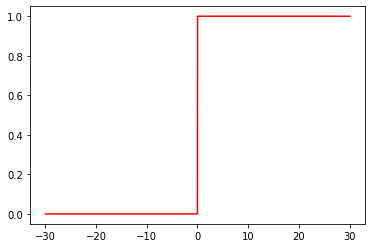

In [14]:
plt.plot(y,step_function(y),color='red')

### Sigmoid
- logistic regression 의 sigmoid 함수.
    - 실제값과 예측값의 차이를 함수로 만들어서 미분함.
- $w_1, w_2, b$ 구함
- step 함수는 미분 해도 큰 의미가 없으므로 sigmoide 개념 도입
- 실제 현실세계에서 가장 많이 나오는 곡선
- $f(x) = \sigma(x) = \frac{1}{1+ exp(-x)} $
    - 0~1 사이값 

In [12]:
def sigmoid(x):
    return 1/( 1+ np.exp(-x))

전반적으로 step function 과 비슷하게 생기고 0~1 사이 값을 갖으나 좀 더 부드러움

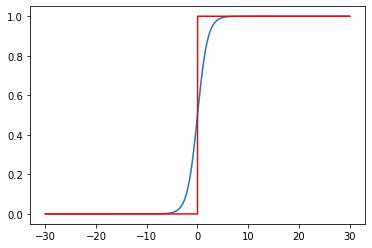

In [16]:
plt.plot(y,sigmoid(y))
plt.plot(y,step_function(y), color='red')

미분을 하게되면 0 보다 큰 값만 나옴 

### Tanh
- Hyperbolic tangent 

- $ f(x)= tanh(x)= \frac{\sinh(x)}{\cosh(x) }= \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x) } =\frac{\exp(2x)-1}{\exp(2x)+1 } $
    - -1 ~ 1 사이 값

In [17]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

sigmoid보다 값 범위가 넓어짐

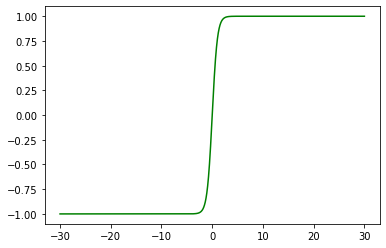

In [18]:
plt.plot(y,tanh(y), color='green')

In [19]:
def tanh(x):
    return np.tanh(x)  #numpy에 이미 존재함

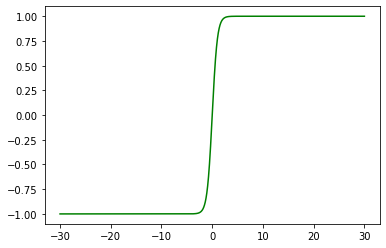

In [20]:
plt.plot(y,tanh(y),color='green')

### ReLu
- Rectified Linear Unit
- Sigmoid 활성화함수가 layer가 많아 짐에 따라서 0 으로 수렴하게 되는 Gradient vanishing 문제를 해결하며 인기 많아짐
- $f(x)= max(0,x)$
    - 0~ Inf사이 값

In [7]:
def Relu(x):
    if x < 0:
        return 0
    else:
        return x

In [1]:
def ReLu(x):  #위와 동일
    return np.maximum(0, x)

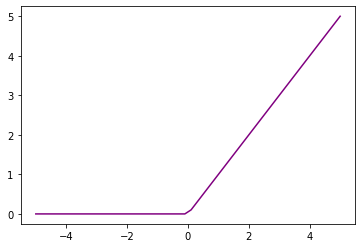

In [6]:
plt.plot(y, ReLu(y), color='purple') #나중에 다룰예정

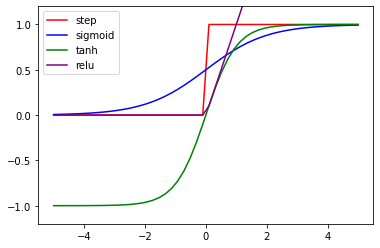

In [30]:
# state machine
# 4개의 활성화 함수 그래프 비교
plt.plot(y, step_function2(y), color='red')
plt.plot(y, sigmoid(y), color='blue')
plt.plot(y,tanh(y),color='green')
plt.plot(y, ReLu(y), color='purple') #나중에 다룰예정
plt.ylim(bottom=-1.2,top=1.2)
plt.legend([ 'step', 'sigmoid','tanh','relu'])

수식을 주면 프로그래밍을 할 수있는 연습 필요

###  Graphical Representation 
다양한 곳에서 유래되어 용어가 조금씩 다르거나 같은 것을 다르게 표현하게됨
- 그림, 수식 다 동일 
  - 3-layer Neural Network 
      - input lyaer 만 제외하고 **hidden, output layer 만 포함**
  - 2-hidden-layer Neural Network
      - input,out 제외하고 **hidden layer만 포함**
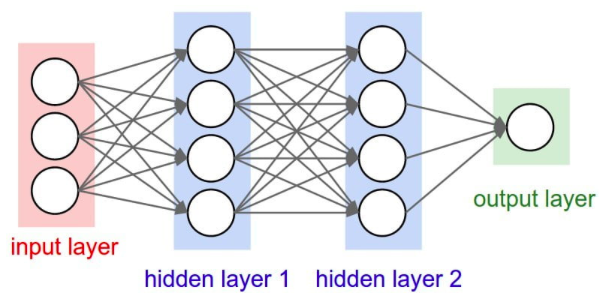

## 원리
- feed forward + back propagation

### Feed Forward
- 입력데이터를 각 레이어로 보내어 output layer에서 출력하는 알고리즘
    - perceptron , multi-layer perceptron(MLP)가 feed forward neural network 
    - input @ wegiht +bias 형태로 전달
- 아래 그림에서는 bias 생략됨
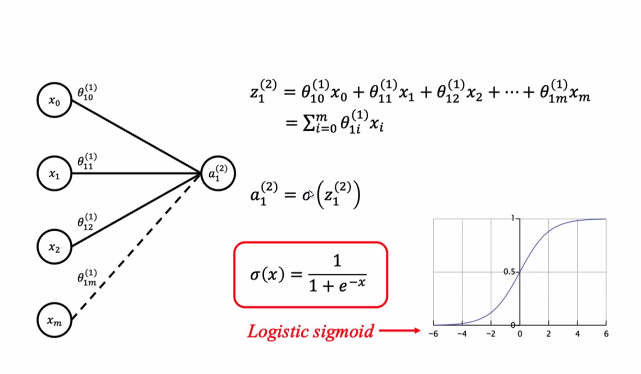

feed forward 계산값을 직접 바꾸어서 상호작용하는 웹페이지
http://jalammar.github.io/feedforward-neural-networks-visual-interactive/

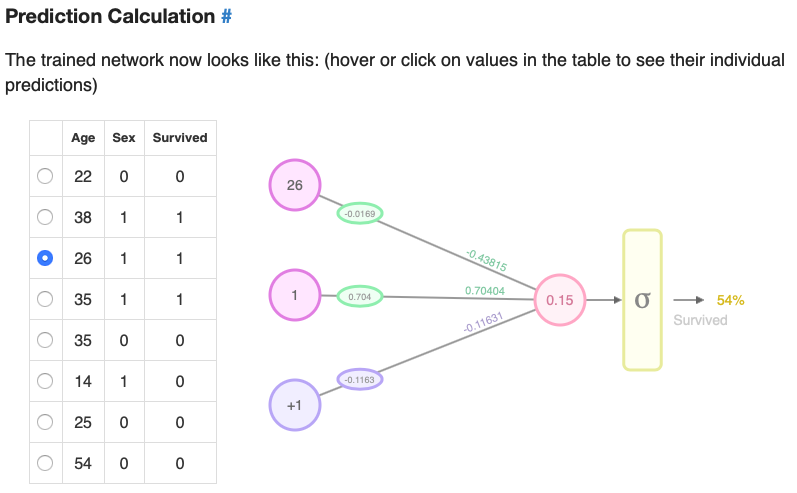

In [18]:
#위의 그림을 최대한 이해 쉽게 작성
import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))

def calculate_prediction(age, sex, weight_1, weight_2, bias):

    layer_2_node = age * weight_1 + sex * weight_2 + 1 * bias

    prediction = sigmoid(layer_2_node)
    return prediction

In [22]:
calculate_prediction(26,1,-0.0169,.70404,-.11631)

0.5370146591466977

행렬 연산
- 벡터, 행렬의 선형결합
    - 이전 시간에 perceptrond으로도 구현했었음
- 행렬크기 맞추는것이 중요 
    - 예 .행렬 크기 (2x1)=(2xm)x(mx1)

In [26]:
#위 예시의 행렬 연산 
X=np.array([26,1])
W=np.array([-0.0169,0.70404])
b=-.11631
y = np.dot(X, W) + b
y

0.14833000000000005

$[x1,x2]@[w1,w2]'+ b =  (x1 * w1)+(x2 * w2)+b$

In [27]:
sigmoid(y) #위와 동일

0.5370146591466977

딥러닝이 문제 해결된 이유 : 연산을 GPU로 함(더 빠르게 처리)
- 데이터 양 많은 :과적합 해결
- 새로운 ml technique (예. perceptron->MLP -> sigmoid 함수..)

### Back Propagation

- 연쇄 법칙(Chain rule)을 적용하여 그라디언트(Gradient)를 계산하기 위해서 출력 레이어부터 입력 레이어로 반대 방향으로  가중치 값을 찾는 학습알고리즘 
    - feed forward 로 계산한 **예측값과 실제값 비교하여 차이(loss function)를 최소화하는 $w$가중치를 찾는 과정**으로 역방향으로 편미분을 하여 기울기를 구함
     - Gradient Descent 알고리즘으로 기울기=0인 지점에 도달하여 가중치를 계산하여 업데이트함.
    - 기계학습: 실제값과 예측값의 차이(loss function)를 최소화하는 파라미터를 찾음
   
- 단순한 feed forward 에서 두 알고리즘을 같이 사용하여 학습하게 되면서 다시 딥러닝은 활기를 찾음

#### Gradient Descent
   - 최적화 알고리즘 중 하나로 backpropagation에서 편미분을 통해서 최소값 찾음
   - **loss function을 최소화**하도록 하기 위해서 뒤의 가중치를 바꿔가면서 input layer까지 계산하여 최소화 되는 w값들을 찾을수있음
    - 임의의 점에서 기울기를 찾음
        - learning rate : 점프하는 정도(보폭)로 신경망의 하이퍼 파라미터(사람 지정)
            - 양의 기울기: 음의 방향으로 점프
            - 음의 기울기 : 양의 방향으로 점프
   미분하고 보폭을 곱해서 계속 업데이트하면서 내려감.->최소값 발견
    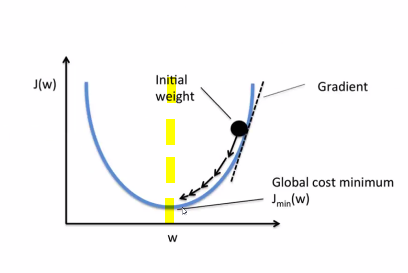

  

    
    
  - 편미분: 변수가 여러 개인경우의 미분
       -  $\frac{dy}{dx}$
  - chain rule: 연속해서 미분.
      -  $\frac{dy}{dx}= \frac{dt}{dx}\frac{dy}{dt}$

  - L : MSE(Mean Squared Error,평균 제곱 오차) Loss function : 
    -  $\frac{1}{n}\sum(y_i-\hat y)^2$
    - 어떠한 경우에는 오차의 합이 0 이되기 떄문에 오차의 제곱의 합을 이용하여 추정
    - 미분으로 최소화함



모두의 딥러닝 ,lec9-2: 딥넷트웍 학습 시키기 (backpropagation) 참고: https://www.youtube.com/watch?v=573EZkzfnZ0&feature=youtu.be
- 편미분, chain rule 이용해서 계산한것을 자세히 설명 

pytorch tutorial에서 직접 구현한 예시: 
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
- Numpy 이용해서 쉬운버전으로 구현 (행렬 연산)

컴퓨터로 표현하는 지수
$e-n= 10^{-n}$

In [28]:
1e-6

1e-06

In [31]:
1e-2

0.01

1. 미분:
$ \frac{df(x)}{dx}=lim \frac{f(x+h)-f(x)}{h}$
    - h는 0 에 가까운 아주작은수

In [33]:
def numerical_diff(f,x):
    h=1e-6 #h는 0 에 가까운 아주작은수
    return (f(x+h)-f(x))/h

In [34]:
# 2 차 함수
def f(x): 
    return x**2 + 3*x #미분 결과2x+3

$y'= 2x+3$


3에 근사

In [35]:
numerical_diff(f,0) 

3.000001

특정점에서 미분

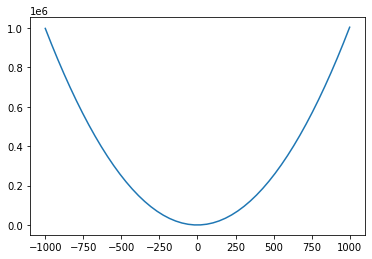

In [38]:
y = np.linspace(-1000 ,1000)
plt.plot(y,f(y))

2. 특정점에서의 접섬 구하기 
y 절편 공식:  $b= f(x)-d(x)$
접섭의 방정식 
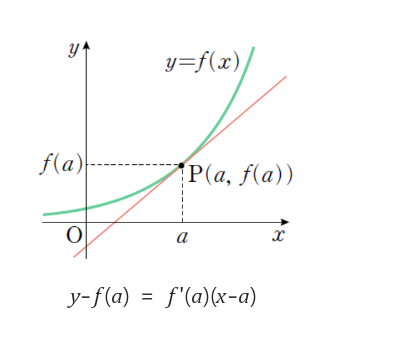

In [39]:
# f(x)=x^2+3x
def f(x): 
    return x**2 + 3*x #미분 결과2x+3

def numerical_diff(f,x):
    h=1e-6 #h는 0 에 가까운 아주작은수
    return (f(x+h)-f(x))/h
#접선(tangent line)
def slope(f,x):
    d=numerical_diff(f,x)  #미분값: 
    b=f(x)-d*x             #특정점에서 각 직선의 값과의 차이    
    return lambda x: d*x+b #접선의 방정식: 기울기 +이전값

In [63]:
numerical_diff(f,-1.5)   #f'(-1.5)

9.99644811372491e-07

In [66]:
x=-1.5
b=f(x)-numerical_diff(f,-1.5)*x
b

-2.249998500532783

In [71]:
 numerical_diff(f,-1.5)*x+b

-2.25

In [80]:
(-1.5)**2-4.5

-2.25

- $f(x)=x^2+3x$
- $f'(x)= 2x+3$

1) x=-1.5 일때 $f(x)=x^2+3x$의 tangent line 의 기울기 m: 

- $ m= f'(-1.5)=2(-1.5)+3=0$

2) y_2 : 
  - f(-1.5)= -1.5^2+3(-1.5)=-2.25

3) 접선 좌표 (x1,y1):
- tangent line 식: 
    - $y-y_1=m(x-x_1)= y-(-2.25) =0(x-(-1.5))= -2.25$ 


(-1000.0, 11455.000005723487)

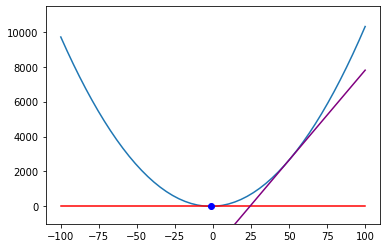

In [75]:
plt.plot(y,f(y))
plt.plot(y,slope(f,-1.5)(y),color='red')
plt.plot(y,slope(f,50)(y),color='purple')
plt.plot(-1.5,-2.25,'bo')
plt.ylim(bottom=-1000)

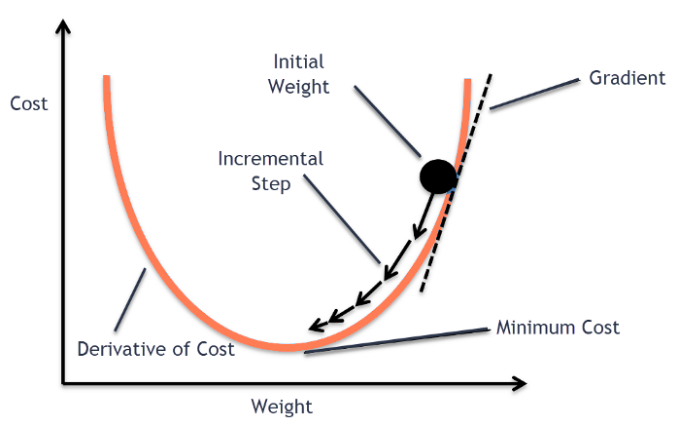
- Gradient Descent 앍리즘에서 기울기에 학습률(Learning rate)/보폭(step size)를 곱하여 보폭만큼 점프해서 점진적으로 이동하면서 구함
    - 사이즈를 너무 크지도 작지도 않게 해야함
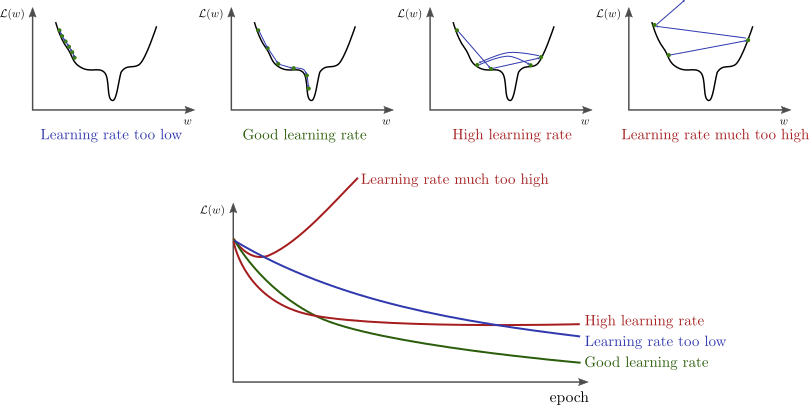

$y=x^2+3x$최소점 찾기.
- 랜덤값 : 10 
- learning rate: 0.5
- 기록1: 10
- 기록2 :11.5
    - 기울기 : y'=2x+3= 23 
   - 23*0.5= 11.5
- 10-11.5=-1.5만큼 움직임.
- 점프가 점점 작아짐을 알 수있음

- 쉬운버전 -행렬X, 벡터 y , 학습률(보폭) lr 
- 전체 중 값 차이가 최소되는 값 .

In [ ]:
#반복을 해서 
def gradient(X,y,theta): #100번 실행
    m=len(y)
    cost_history=np.zeros(100)
    theta_history=np.zeros((100,2))
    
    for  i in range(100):
        pred=np.dot(X,theta)
        theta=theta-(1/m)*0.01*(X.T.dot((prediction.y))) #lr=0.01보폭의 정도
        theta_history[i,:]=theta.T
        cost_history[i]=0
    return 

1차식인 경우
- x[0]일때 3
- temp_val=3
- $f=x^2+3x$
- x[0]=3+h=3.000001
- x[1]=3-h=2.999999
- grad = 기울기 = 3.0001-2,9999/0.00001*2

In [83]:
### gradeint descent -1차식인 경우로 구현 
def gradient(f,x):
    h=1e-6
    grad=np.zeros_like(x)   #x 와 동일한 크기로 초기화 
    for i in range(x.size): #돌면서 값 바꿈
        
        temp_val =x[i]
        x[i]=float(temp_val)+h
        fxh1=f(x)
        x[i]=float(temp_val)-h
        fxh2=f(x)
        
        grad[i]=(fxh1-fxh2)/2*h # 미분 :f(x+h)-f(x-h)= f(x+h)-f(h) /-(f(xh)-)
        x[i]=temp_val # update
    return grad

- 1차식 
    - size= 2 (3이 두개)

In [100]:
gradient(f, np.array([4])) 

array([5.e-06])

In [102]:
gradient(f, np.array([4,1])) 

array([0.e+00, 2.e-06])

 Neural Net이 강력한 이유
   - 여러개의 layer를 지나면서 값들이 들어와 activation function으로 새로운 값이 들어가고 weight,bias 더해져서 최종 결과값이 나옴(복잡한 형태로 공간 변형,왜곡)
 - 데이터가 많으면 perceptron에서 못했던 복잡한 데이터를  수 있게됨.           

## 문제점

###  overfitting 
 - 모델이 복잡할 수록 (레이어가 많아질 수록) 성능이 좋으나 과적합 현상 발생  
        - high bias: underfitting
       - high variance:overfitting
                 
### Gradient Vanishing 
- 레이어가 많을수록 미분값이 0에 가까워 지면서 weight 값을 찾을수가 없어 학습 불가
-  MLP가 위와 같은 문제를 해결하지 못하여 다시 죽어버림
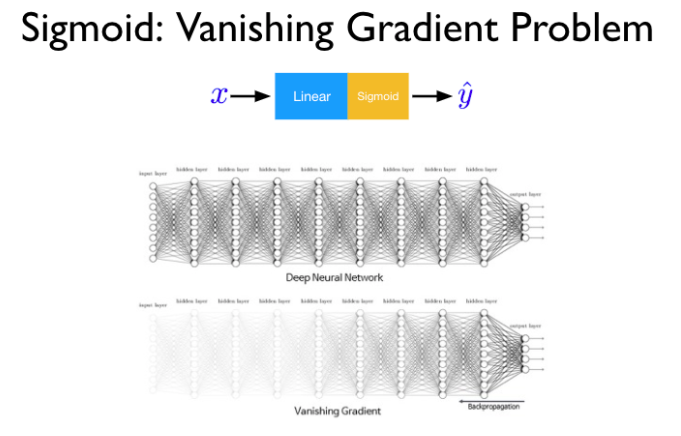
 
 - 위의 문제를  ReLu 활성 함수 사용을 통해서 한계 해결


--- 
1. 하루정도 날잡아서 미분 강의 예정.
2. 내일부터는 tensorflow 위주로 개념을 어떻게 활용하는지 이해가 필요
- 깊게 공부하게 되면 미분, 편미분, chain rule 이해가 필요
- 내일부터  tensorflow 이용